In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# test this works on your machine
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.inspection import permutation_importance
# to fix vscode issues with matplotlib
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.edgecolor'] = 'white'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)

# change the path to read in the data
df = pd.read_csv('../output/state_poverty_and_income.csv')
poverty_state =pd.read_csv("../output/state_poverty.csv")
state_df = pd.read_csv("../ml/state_salary.csv")

In [2]:
states_merged = state_df.merge(poverty_state, on=['STATE', 'YEAR'])

Remove rotary cylinder type (only string value) convert column to float
- Removed from the beginning to keep shape

In [3]:
df.columns


Index(['Unnamed: 0', 'AREA', 'STATE', 'OCC_CODE', 'OCC_TITLE', 'OCC_GROUP',
       'TOT_EMP', 'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'H_MEAN', 'A_MEAN',
       'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90',
       'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'YEAR',
       'SAEMHI_MOE', 'SAEMHI_PT', 'SAEMHI_UB90', 'SAEPOV0_17_LB90',
       'SAEPOV0_17_MOE', 'SAEPOV0_17_PT', 'SAEPOV0_17_UB90', 'SAEPOV0_4_LB90',
       'SAEPOV0_4_MOE', 'SAEPOV0_4_PT', 'SAEPOV0_4_UB90', 'SAEPOV5_17R_LB90',
       'SAEPOV5_17R_MOE', 'SAEPOV5_17R_PT', 'SAEPOV5_17R_UB90',
       'SAEPOVALL_LB90', 'SAEPOVALL_MOE', 'SAEPOVALL_PT', 'SAEPOVALL_UB90',
       'SAEPOVRT0_17_LB90', 'SAEPOVRT0_17_MOE', 'SAEPOVRT0_17_PT',
       'SAEPOVRT0_17_UB90', 'SAEPOVRT0_4_LB90', 'SAEPOVRT0_4_MOE',
       'SAEPOVRT0_4_PT', 'SAEPOVRT0_4_UB90', 'SAEPOVRT5_17R_LB90',
       'SAEPOVRT5_17R_MOE', 'SAEPOVRT5_17R_PT', 'SAEPOVRT5_17R_UB90',
       'SAEPOVRTALL_LB90', 'SAEPOVRTALL_MOE', 'SAEPOVRTALL_PT'

In [4]:
y = df['SAEPOVRTALL_PT']

 #df_train = df[['MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
#        'Cylinders', 'EngineSize', 'Horsepower', 'RPM','Rev.per.mile',
#        'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
#        'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
#        'Weight', 'Origin']]

df_train =df[['AREA', 'STATE', 
              #'OCC_CODE', 'OCC_TITLE', 'OCC_GROUP',
       'TOT_EMP', 'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'H_MEAN', 'A_MEAN',
       'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90',
       'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'YEAR',
       'SAEMHI_MOE', 'SAEMHI_PT', 'SAEMHI_UB90', 
       # 'SAEPOV0_17_LB90',
       # 'SAEPOV0_17_MOE', 'SAEPOV0_17_PT', 'SAEPOV0_17_UB90', 'SAEPOV0_4_LB90',
       # 'SAEPOV0_4_MOE', 'SAEPOV0_4_PT', 'SAEPOV0_4_UB90', 'SAEPOV5_17R_LB90',
       # 'SAEPOV5_17R_MOE', 'SAEPOV5_17R_PT', 'SAEPOV5_17R_UB90',
       # 'SAEPOVALL_LB90', 'SAEPOVALL_MOE', 'SAEPOVALL_PT', 'SAEPOVALL_UB90',
       # 'SAEPOVRT0_17_LB90', 'SAEPOVRT0_17_MOE', 'SAEPOVRT0_17_PT',
       # 'SAEPOVRT0_17_UB90', 'SAEPOVRT0_4_LB90', 'SAEPOVRT0_4_MOE',
       # 'SAEPOVRT0_4_PT', 'SAEPOVRT0_4_UB90', 'SAEPOVRT5_17R_LB90',
       # 'SAEPOVRT5_17R_MOE', 'SAEPOVRT5_17R_PT', 'SAEPOVRT5_17R_UB90',
       # 'SAEPOVRTALL_LB90', 'SAEPOVRTALL_MOE', 
       # 'SAEPOVRTALL_UB90', 'SAEPOVU_0_17', 'SAEPOVU_0_4', 'SAEPOVU_5_17R',
       # 'SAEPOVU_ALL'
       ]]

In [5]:
df_train.head()


,AREA,STATE,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,YEAR,SAEMHI_MOE,SAEMHI_PT,SAEMHI_UB90
0,1,Alabama,1922570,0.4,1000.000,1.00,20.76,43170.0,0.5,8.54,10.45,15.77,25.01,37.83,17770.0,21740.0,32800.0,52020.0,78690.0,2017,742.0,48193.0,48935.0
1,1,Alabama,69950,1.0,36.385,0.71,53.44,111150.0,0.6,25.06,33.71,46.63,64.12,90.80,52130.0,70130.0,96980.0,133360.0,188860.0,2017,742.0,48193.0,48935.0
2,1,Alabama,540,6.4,0.280,0.18,59.34,123430.0,3.9,28.80,36.64,53.05,74.94,97.48,59910.0,76200.0,110350.0,155860.0,202750.0,2017,742.0,48193.0,48935.0
3,1,Alabama,2220,5.7,1.157,0.44,60.88,126630.0,2.4,29.63,40.31,53.69,74.02,99.08,61630.0,83850.0,111680.0,153960.0,206080.0,2017,742.0,48193.0,48935.0
4,1,Alabama,430,7.6,0.222,0.47,45.32,94270.0,2.8,26.57,31.78,39.62,51.22,74.08,55270.0,66100.0,82400.0,106530.0,154080.0,2017,742.0,48193.0,48935.0


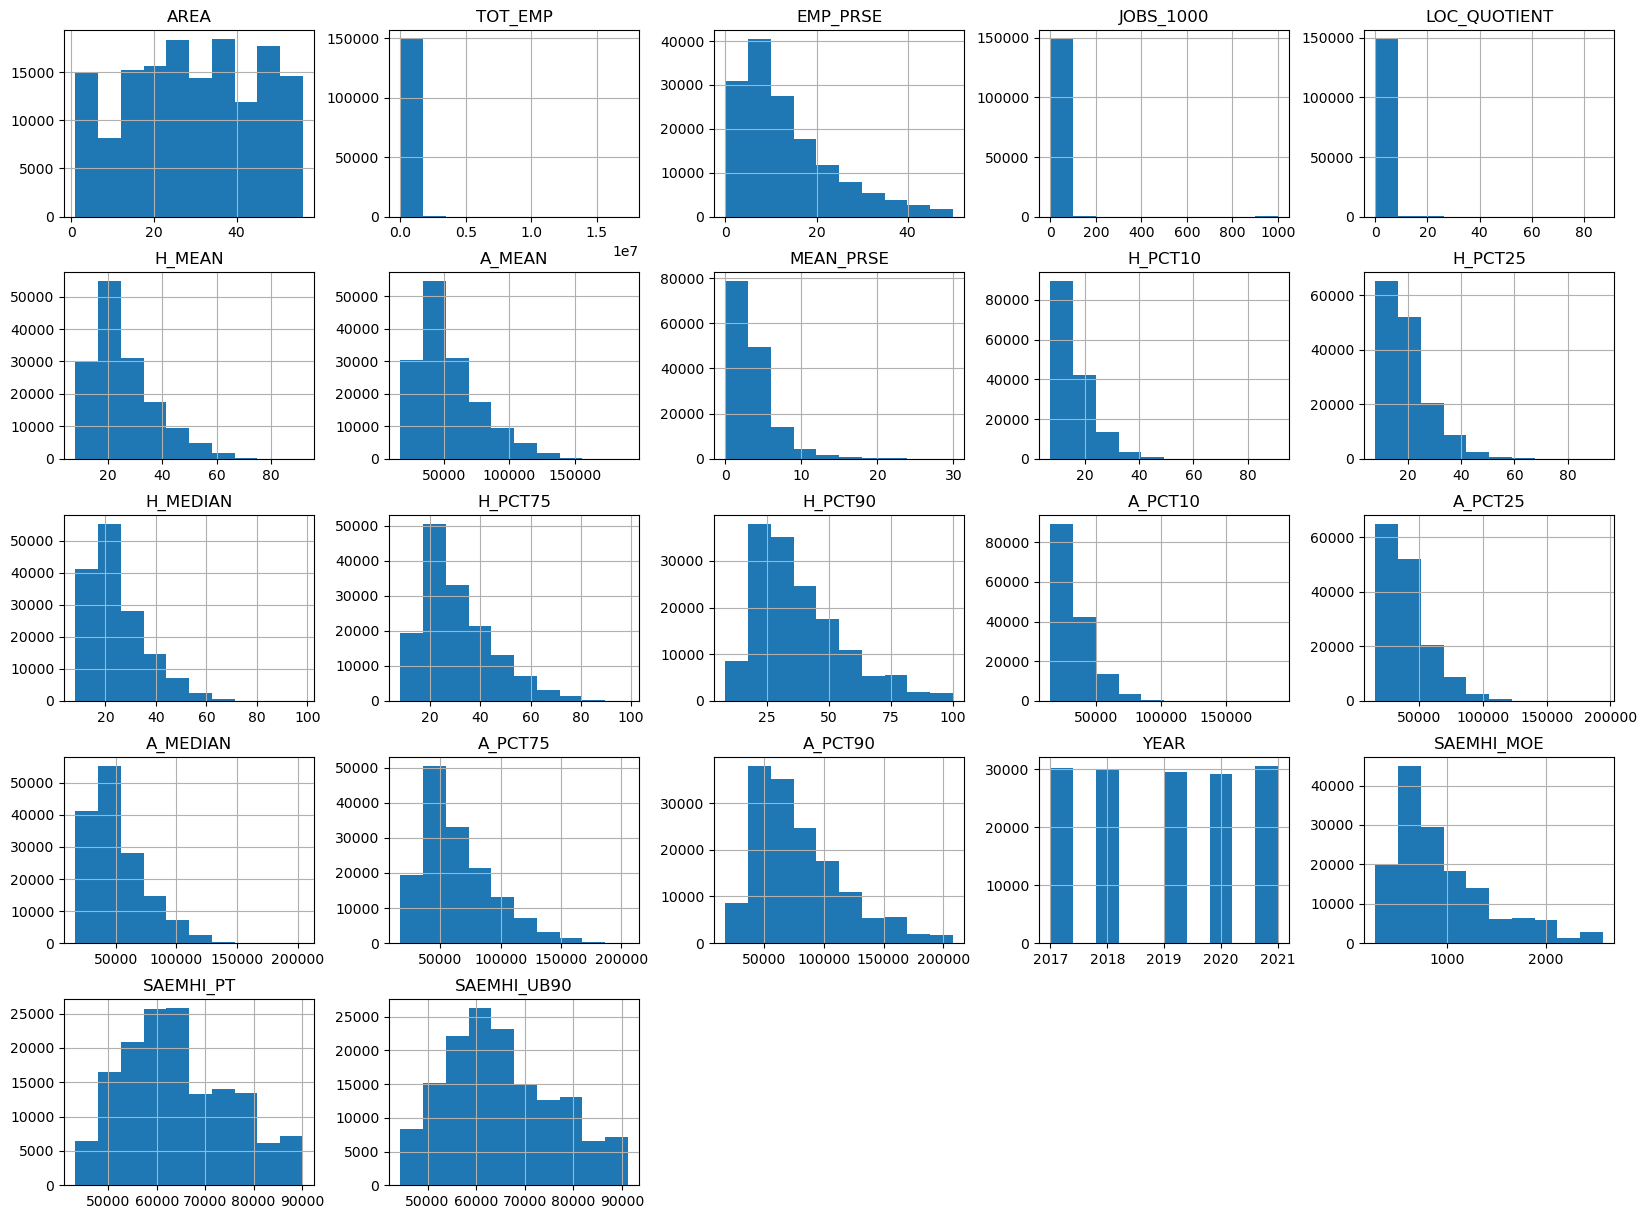

In [6]:
df_train.select_dtypes(include=np.number).hist(figsize=(20,15));

In [7]:
df_train.shape, y.shape

((149481, 23), (149481,))

In [8]:
df_train.dtypes

AREA              int64
STATE            object
TOT_EMP           int64
EMP_PRSE        float64
JOBS_1000       float64
LOC_QUOTIENT    float64
H_MEAN          float64
A_MEAN          float64
MEAN_PRSE       float64
H_PCT10         float64
H_PCT25         float64
H_MEDIAN        float64
H_PCT75         float64
H_PCT90         float64
A_PCT10         float64
A_PCT25         float64
A_MEDIAN        float64
A_PCT75         float64
A_PCT90         float64
YEAR              int64
SAEMHI_MOE      float64
SAEMHI_PT       float64
SAEMHI_UB90     float64
dtype: object

Get Dummies for Catergorial Data

In [9]:
X_dummy = pd.get_dummies(df_train, columns=['STATE'], drop_first=True)
#X_dummy = pd.get_dummies(X_dummy, columns=['OCC_CODE'], drop_first=True)
#X_dummy = pd.get_dummies(X_dummy, columns=['OCC_TITLE'], drop_first=True)
#X_dummy = pd.get_dummies(X_dummy, columns=['OCC_GROUP'], drop_first=True)


Set Parameters for algorithm  
- n_estimators : The number of boosting stages: default == 100
- max_depth : limits the number of nodes in the tree
- min_sample_split : the minimum number of samples required to split an internal node
- learning_rate : how much the contribution of each tree will shrink
- loss : loss function to optimize.

https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html


In [10]:
params = {
    "n_estimators": 100,
    "max_depth": 4,
    "min_samples_split": 10,
    "learning_rate": 0.01,
    "loss": "squared_error"
}

Check for nulls

In [11]:
X_dummy.isna().sum()


AREA                    0
TOT_EMP                 0
EMP_PRSE                0
JOBS_1000               0
LOC_QUOTIENT            0
H_MEAN                  0
A_MEAN                  0
MEAN_PRSE               0
H_PCT10                 0
H_PCT25                 0
H_MEDIAN                0
H_PCT75                 0
H_PCT90                 0
A_PCT10                 0
A_PCT25                 0
A_MEDIAN                0
A_PCT75                 0
A_PCT90                 0
YEAR                    0
SAEMHI_MOE              0
SAEMHI_PT               0
SAEMHI_UB90             0
STATE_Alaska            0
STATE_Arizona           0
STATE_Arkansas          0
STATE_California        0
STATE_Colorado          0
STATE_Connecticut       0
STATE_Delaware          0
STATE_Florida           0
STATE_Georgia           0
STATE_Hawaii            0
STATE_Idaho             0
STATE_Illinois          0
STATE_Indiana           0
STATE_Iowa              0
STATE_Kansas            0
STATE_Kentucky          0
STATE_Louisi

In [12]:
X_dummy.dropna();

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.3, random_state=8)

In [14]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse_xgboost = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse_xgboost))

The mean squared error (MSE) on test set: 1.5437


In [15]:
reg.train_score_

array([7.18355816, 7.05871121, 6.93634872, 6.81642125, 6.69883944,
       6.58359257, 6.47165504, 6.36085006, 6.25222135, 6.14573588,
       6.04134129, 5.93900434, 5.83867396, 5.73940604, 5.64249029,
       5.54747449, 5.45472548, 5.36338288, 5.27308253, 5.18517529,
       5.09929731, 5.01479139, 4.93242864, 4.85118067, 4.7704072 ,
       4.69259053, 4.61591523, 4.53943963, 4.46456115, 4.3921149 ,
       4.32163952, 4.25037257, 4.1809315 , 4.11381054, 4.0465352 ,
       3.98096948, 3.918073  , 3.85416521, 3.79352142, 3.73274769,
       3.67298641, 3.61452606, 3.55836146, 3.50303987, 3.44738443,
       3.39334231, 3.3409353 , 3.28967934, 3.23786755, 3.18840422,
       3.13807938, 3.08907998, 3.04233281, 2.99725355, 2.95107598,
       2.90757524, 2.86285523, 2.81861555, 2.77681106, 2.73646786,
       2.69503601, 2.65556487, 2.61528286, 2.57714918, 2.53811731,
       2.50145524, 2.46368663, 2.42690154, 2.39154108, 2.35791177,
       2.3236565 , 2.28936659, 2.25677394, 2.22392416, 2.19230

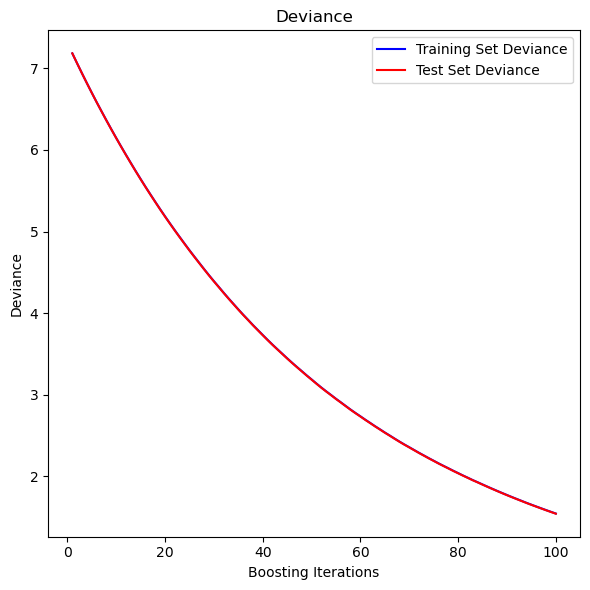

In [16]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

Plot Feature Importance
- Sorted the features and took the top 10

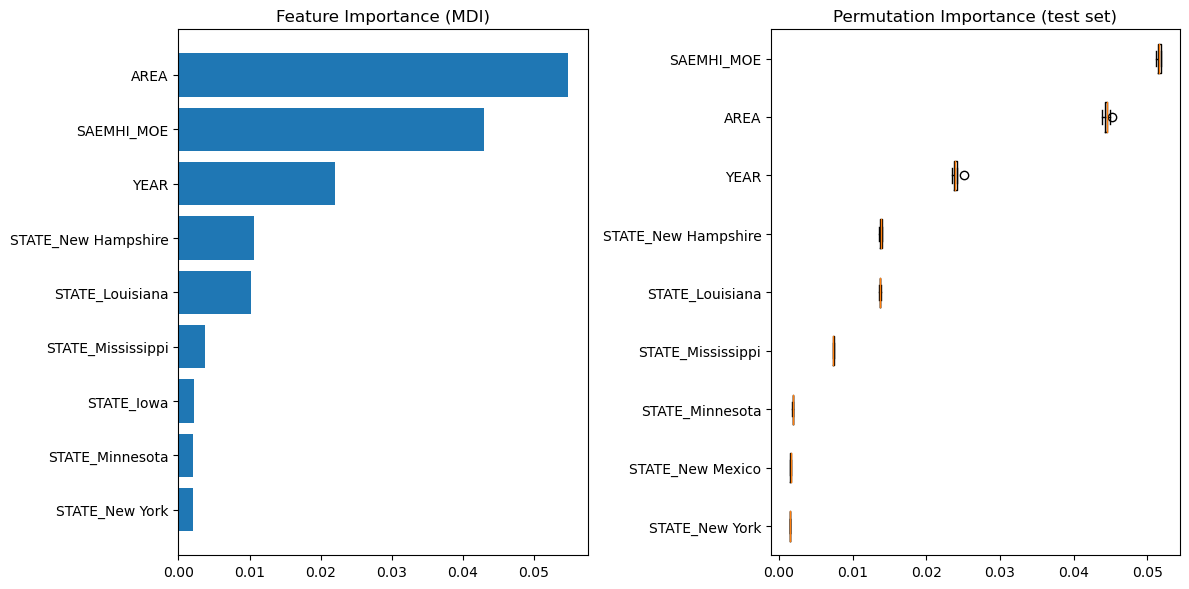

In [17]:
feature_names = (X_test.columns)
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[~10:]
sorted_idx = sorted_idx[:~1]
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
sorted_idx = sorted_idx[~10:]
sorted_idx = sorted_idx[:~1]
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T ,
    vert=False,
    labels=np.array(feature_names)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

### Linear Regression


In [18]:
y_linear = df['SAEPOVRTALL_PT']
X_linear = df[['AREA', 'TOT_EMP', 'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'H_MEAN', 'A_MEAN',
       'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90',
       'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'YEAR',
       'SAEMHI_MOE', 'SAEMHI_PT', 'SAEMHI_UB90', 
       # 'SAEPOV0_17_LB90',
       # 'SAEPOV0_17_MOE', 'SAEPOV0_17_PT', 'SAEPOV0_17_UB90', 'SAEPOV0_4_LB90',
       # 'SAEPOV0_4_MOE', 'SAEPOV0_4_PT', 'SAEPOV0_4_UB90', 'SAEPOV5_17R_LB90',
       # 'SAEPOV5_17R_MOE', 'SAEPOV5_17R_PT', 'SAEPOV5_17R_UB90',
       # 'SAEPOVALL_LB90', 'SAEPOVALL_MOE', 'SAEPOVALL_PT', 'SAEPOVALL_UB90',
       # 'SAEPOVRT0_17_LB90', 'SAEPOVRT0_17_MOE', 'SAEPOVRT0_17_PT',
       # 'SAEPOVRT0_17_UB90', 'SAEPOVRT0_4_LB90', 'SAEPOVRT0_4_MOE',
       # 'SAEPOVRT0_4_PT', 'SAEPOVRT0_4_UB90', 'SAEPOVRT5_17R_LB90',
       # 'SAEPOVRT5_17R_MOE', 'SAEPOVRT5_17R_PT', 'SAEPOVRT5_17R_UB90',
       # 'SAEPOVRTALL_LB90', 'SAEPOVRTALL_MOE', 
       # 'SAEPOVRTALL_UB90', 'SAEPOVU_0_17', 'SAEPOVU_0_4', 'SAEPOVU_5_17R',
       # 'SAEPOVU_ALL'
       ]]


X_linear.head()

,AREA,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,YEAR,SAEMHI_MOE,SAEMHI_PT,SAEMHI_UB90
0,1,1922570,0.4,1000.000,1.00,20.76,43170.0,0.5,8.54,10.45,15.77,25.01,37.83,17770.0,21740.0,32800.0,52020.0,78690.0,2017,742.0,48193.0,48935.0
1,1,69950,1.0,36.385,0.71,53.44,111150.0,0.6,25.06,33.71,46.63,64.12,90.80,52130.0,70130.0,96980.0,133360.0,188860.0,2017,742.0,48193.0,48935.0
2,1,540,6.4,0.280,0.18,59.34,123430.0,3.9,28.80,36.64,53.05,74.94,97.48,59910.0,76200.0,110350.0,155860.0,202750.0,2017,742.0,48193.0,48935.0
3,1,2220,5.7,1.157,0.44,60.88,126630.0,2.4,29.63,40.31,53.69,74.02,99.08,61630.0,83850.0,111680.0,153960.0,206080.0,2017,742.0,48193.0,48935.0
4,1,430,7.6,0.222,0.47,45.32,94270.0,2.8,26.57,31.78,39.62,51.22,74.08,55270.0,66100.0,82400.0,106530.0,154080.0,2017,742.0,48193.0,48935.0


In [19]:
X_linear.dropna();

In [20]:
X_linear.columns

Index(['AREA', 'TOT_EMP', 'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'H_MEAN',
       'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75',
       'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90',
       'YEAR', 'SAEMHI_MOE', 'SAEMHI_PT', 'SAEMHI_UB90'],
      dtype='object')

### Train_Test_Split

In [21]:
results = train_test_split(X_linear, y, random_state=42, test_size=0.333 )
X_linear_train, X_linear_test, y_linear_train, y_linear_test = results


### Fit/Score Model

In [22]:
model = LinearRegression()
model.fit(X_linear_train, y_linear_train)
print(model.score(X_linear_train, y_linear_train))
print(model.score(X_linear_test, y_linear_test))

0.6908501216302004
0.6895452777800464


### Model Evaluation Metrics
- R2
- Mean Absolute Error
- Mean Squared Error (MSE)  

In [23]:
r2_linear = r2_score(y_linear_test, model.predict(X_linear_test))
mae_linear = mean_absolute_error(y_linear_test, model.predict(X_linear_test))
mse_linear = mean_squared_error(y_linear_test, model.predict(X_linear_test))
print("The R2 on test set: {:.4f}".format(r2_linear))
print("The Mean Absolute Error on test set: {:.4f}".format(mae_linear))
print("The Mean Squared Error on test set: {:.4f}".format(mse_linear))


The R2 on test set: 0.6895
The Mean Absolute Error on test set: 1.2172
The Mean Squared Error on test set: 2.2632


In [24]:
yhat = model.predict(X_linear)

In [25]:
results = pd.concat([pd.DataFrame(y), X_linear, pd.DataFrame(yhat)], axis=1)
results.columns = ['PR_ALL', 'AREA', 'TOT_EMP', 'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'H_MEAN', 'A_MEAN',
       'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90',
       'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'YEAR',
       'SAEMHI_MOE', 'SAEMHI_PT', 'SAEMHI_UB90', 
       # 'SAEPOV0_17_LB90',
       # 'SAEPOV0_17_MOE', 'SAEPOV0_17_PT', 'SAEPOV0_17_UB90', 'SAEPOV0_4_LB90',
       # 'SAEPOV0_4_MOE', 'SAEPOV0_4_PT', 'SAEPOV0_4_UB90', 'SAEPOV5_17R_LB90',
       # 'SAEPOV5_17R_MOE', 'SAEPOV5_17R_PT', 'SAEPOV5_17R_UB90',
       # 'SAEPOVALL_LB90', 'SAEPOVALL_MOE', 'SAEPOVALL_PT', 'SAEPOVALL_UB90',
       # 'SAEPOVRT0_17_LB90', 'SAEPOVRT0_17_MOE', 'SAEPOVRT0_17_PT',
       # 'SAEPOVRT0_17_UB90', 'SAEPOVRT0_4_LB90', 'SAEPOVRT0_4_MOE',
       # 'SAEPOVRT0_4_PT', 'SAEPOVRT0_4_UB90', 'SAEPOVRT5_17R_LB90',
       # 'SAEPOVRT5_17R_MOE', 'SAEPOVRT5_17R_PT', 'SAEPOVRT5_17R_UB90',
       # 'SAEPOVRTALL_LB90', 'SAEPOVRTALL_MOE', 
       # 'SAEPOVRTALL_UB90', 'SAEPOVU_0_17', 'SAEPOVU_0_4', 'SAEPOVU_5_17R',
       # 'SAEPOVU_ALL', 
       'Yhat']
results.head(5)

,PR_ALL,AREA,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,YEAR,SAEMHI_MOE,SAEMHI_PT,SAEMHI_UB90,Yhat
0,16.9,1,1922570,0.4,1000.000,1.00,20.76,43170.0,0.5,8.54,10.45,15.77,25.01,37.83,17770.0,21740.0,32800.0,52020.0,78690.0,2017,742.0,48193.0,48935.0,15.558371
1,16.9,1,69950,1.0,36.385,0.71,53.44,111150.0,0.6,25.06,33.71,46.63,64.12,90.80,52130.0,70130.0,96980.0,133360.0,188860.0,2017,742.0,48193.0,48935.0,16.052386
2,16.9,1,540,6.4,0.280,0.18,59.34,123430.0,3.9,28.80,36.64,53.05,74.94,97.48,59910.0,76200.0,110350.0,155860.0,202750.0,2017,742.0,48193.0,48935.0,16.143599
3,16.9,1,2220,5.7,1.157,0.44,60.88,126630.0,2.4,29.63,40.31,53.69,74.02,99.08,61630.0,83850.0,111680.0,153960.0,206080.0,2017,742.0,48193.0,48935.0,16.064285
4,16.9,1,430,7.6,0.222,0.47,45.32,94270.0,2.8,26.57,31.78,39.62,51.22,74.08,55270.0,66100.0,82400.0,106530.0,154080.0,2017,742.0,48193.0,48935.0,15.916237


In [26]:
results['Residual'] = results['PR_ALL'] - results['Yhat']
results.head(5)

,PR_ALL,AREA,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,YEAR,SAEMHI_MOE,SAEMHI_PT,SAEMHI_UB90,Yhat,Residual
0,16.9,1,1922570,0.4,1000.000,1.00,20.76,43170.0,0.5,8.54,10.45,15.77,25.01,37.83,17770.0,21740.0,32800.0,52020.0,78690.0,2017,742.0,48193.0,48935.0,15.558371,1.341629
1,16.9,1,69950,1.0,36.385,0.71,53.44,111150.0,0.6,25.06,33.71,46.63,64.12,90.80,52130.0,70130.0,96980.0,133360.0,188860.0,2017,742.0,48193.0,48935.0,16.052386,0.847614
2,16.9,1,540,6.4,0.280,0.18,59.34,123430.0,3.9,28.80,36.64,53.05,74.94,97.48,59910.0,76200.0,110350.0,155860.0,202750.0,2017,742.0,48193.0,48935.0,16.143599,0.756401
3,16.9,1,2220,5.7,1.157,0.44,60.88,126630.0,2.4,29.63,40.31,53.69,74.02,99.08,61630.0,83850.0,111680.0,153960.0,206080.0,2017,742.0,48193.0,48935.0,16.064285,0.835715
4,16.9,1,430,7.6,0.222,0.47,45.32,94270.0,2.8,26.57,31.78,39.62,51.22,74.08,55270.0,66100.0,82400.0,106530.0,154080.0,2017,742.0,48193.0,48935.0,15.916237,0.983763


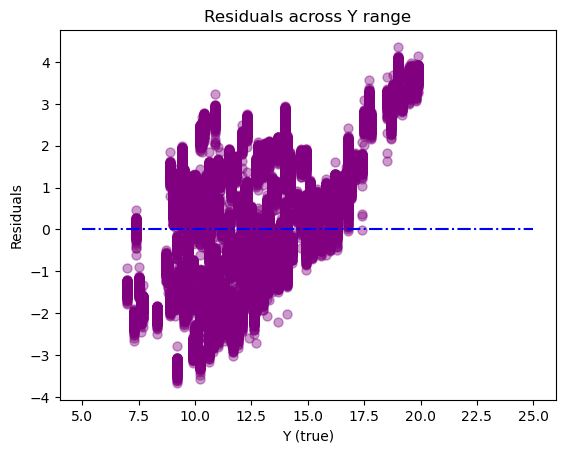

In [27]:
plt.scatter(results['PR_ALL'], results['Residual'], alpha=0.4, s= 42, c='purple');
plt.ylabel('Residuals')
plt.xlabel('Y (true)')
plt.title('Residuals across Y range')
plt.plot([5,25],[0,0], linestyle='dashdot', color='blue', markersize=2);

In [28]:
y_mean=y.mean()

### Ridge Regression

class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)

Linear least squares with l2 regularization.

Minimizes the objective function:

||y - Xw||^2_2 + alpha * ||w||^2_2

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)).

In [29]:
from sklearn.linear_model import Ridge

In [30]:
model = Ridge(alpha=1e-2).fit(X_train, y_train)
model.score(X_test, y_test)

c:\Users\kendr\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.06811e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


0.9718997309469872

### Using the Permutation feature importance
- R2
- neg_mean_absolute_percentage_error
- neg_mean_squared_error

In [31]:
scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']
r_multi = permutation_importance(
    model, X_test, y_test, n_repeats=30, random_state=0, scoring=scoring)

for metric in r_multi:
    print(f"{metric}")
    r = r_multi[metric]
    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"    {feature_names[i]:<8}"
                  f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")

r2
    A_PCT90 147.792 +/- 0.800
    A_MEDIAN146.015 +/- 0.746
    H_PCT90 144.730 +/- 0.779
    H_MEDIAN144.104 +/- 0.729
    A_PCT25 135.399 +/- 0.615
    H_PCT25 134.203 +/- 0.602
    H_PCT10 77.383 +/- 0.362
    A_PCT10 77.315 +/- 0.369
    H_MEAN  72.461 +/- 0.371
    A_PCT75 69.254 +/- 0.369
    H_PCT75 68.029 +/- 0.359
    A_MEAN  67.069 +/- 0.348
    SAEMHI_UB900.837 +/- 0.004
    AREA    0.209 +/- 0.001
    STATE_Mississippi0.097 +/- 0.001
    STATE_New Mexico0.078 +/- 0.001
    STATE_Louisiana0.078 +/- 0.001
    STATE_West Virginia0.065 +/- 0.000
    STATE_Colorado0.053 +/- 0.000
    STATE_Iowa0.046 +/- 0.000
    STATE_Minnesota0.046 +/- 0.000
    SAEMHI_PT0.037 +/- 0.000
    STATE_New Hampshire0.037 +/- 0.000
    STATE_Idaho0.036 +/- 0.000
    STATE_Nebraska0.033 +/- 0.000
    STATE_Maine0.030 +/- 0.000
    STATE_Kansas0.028 +/- 0.000
    STATE_Texas0.024 +/- 0.000
    STATE_Indiana0.024 +/- 0.000
    STATE_Connecticut0.023 +/- 0.000
    SAEMHI_MOE0.017 +/- 0.000
    STATE_F

In [32]:
print(f'The MSE using XGBoost was : {mse_xgboost}')
print(f'The MSE using Linear Regression was: {mse_linear}')

The MSE using XGBoost was : 1.5436937524205818
The MSE using Linear Regression was: 2.263226670392916
